In [7]:
from _5_WSI_RIM_Tabulation import return_results

In [10]:
# ! realpath webapp_images_dzi/images
# ! ls
# ! rm sanity_check2/* -rf

aty_0_12_16_R_orig.pkl	 aty_31_1_12_N_orig.pkl   aty_41_10_15_R_orig.pkl
aty_16_10_17_R_orig.pkl  aty_31_2_12_N_orig.pkl   aty_41_4_12_R_orig.pkl
aty_2_6_15_N_orig.pkl	 aty_31_9_14_N_orig.pkl   neg_18_4_14_N_orig.pkl
aty_30_6_15_N_orig.pkl	 aty_37_2_12_R_orig.pkl
aty_31_14_17_N_orig.pkl  aty_38_10_18_N_orig.pkl


In [11]:
import os, pickle
wsi_file='example_full_scans/neg_18_4_14_N_orig.npy'
return_results(wsi_file,
                   out_dir='sanity_check2',
                   gpu_id=0,
                   seg_model="segmentation_practice/uro_seg/49.checkpoint.pth",#30.
                   uro_model="uro_net/11.checkpoint.pth",
                   aty_model="aty_net/111.checkpoint.pth",
                   include_all=True
                   )


(44475, 42870, 3)


/dartfs/rc/lab/V/VaickusL_slow/users/jlevy/autoparis/_5_WSI_RIM_Tabulation.py:179: FutureWarning:

The coordinates keyword argument to skimage.measure.regionprops is deprecated. All features are now computed in rc (row-column) coordinates. Please remove `coordinates="rc"` from all calls to regionprops before updating scikit-image.

100%|██████████| 30443/30443 [01:18<00:00, 388.32it/s]
119it [01:53,  1.05it/s]                         
119it [01:05,  1.82it/s]                         
119it [01:05,  1.82it/s]                         
100%|██████████| 30443/30443 [00:00<00:00, 103534.89it/s]


In [65]:
basename=os.path.basename(wsi_file)
out_file=os.path.join("sanity_check2",f"{basename[:basename.rfind('.')]}.pkl")
stat=pickle.load(open(out_file,'rb'))

In [92]:
from scipy.special import softmax
import pandas as pd
def edit_stats(stat):
    stats2={}
    
#     include=softmax(stat['uro_decision'],1).argmax(1)==0#[:,0]>0.99#
    stats2['nc_ratio']=(stat['nc'][2]/(stat['nc'][2]+stat['nc'][1]))#[include]
    stats2['atypia']=stat['atypia']#[include]
#     print(len(stats2['uro']))
    stat_new=pd.concat([pd.DataFrame(stats2),stat['cell_stats']],axis=1)#.loc[include]
    stat_new['uro']=softmax(stat['uro_decision'],1)[:,0].flatten()
    return stat_new

In [93]:
stat2=edit_stats(stat)

In [94]:
# stat2

In [95]:
# stat2['filled_area'].hist()

In [96]:
# stat2

Text(0, 0.5, 'Uncalibrated Atypia Score')

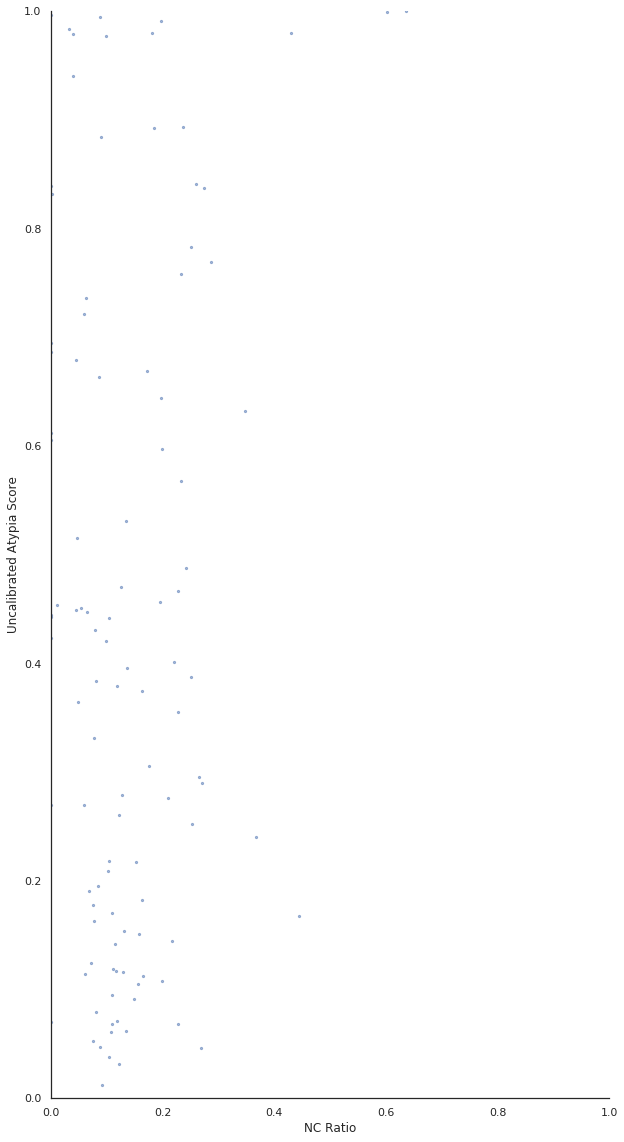

In [108]:
import matplotlib.pyplot as plt, matplotlib, seaborn as sns
import os
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
%matplotlib inline
plt.figure(figsize=(10,20))
nc_ratio,atypia_score=stat2[(stat2['filled_area']<=4000) & (stat2['filled_area']>=500) & (stat2['uro']>0.98)].values[:,:2].T.tolist()#
plt.scatter(nc_ratio,atypia_score,s=5,alpha=0.5)
plt.xlim([0,1])
plt.ylim([0,1])
sns.despine()
plt.xlabel('NC Ratio')
plt.ylabel('Uncalibrated Atypia Score')

Text(0, 0.5, 'Atypia')

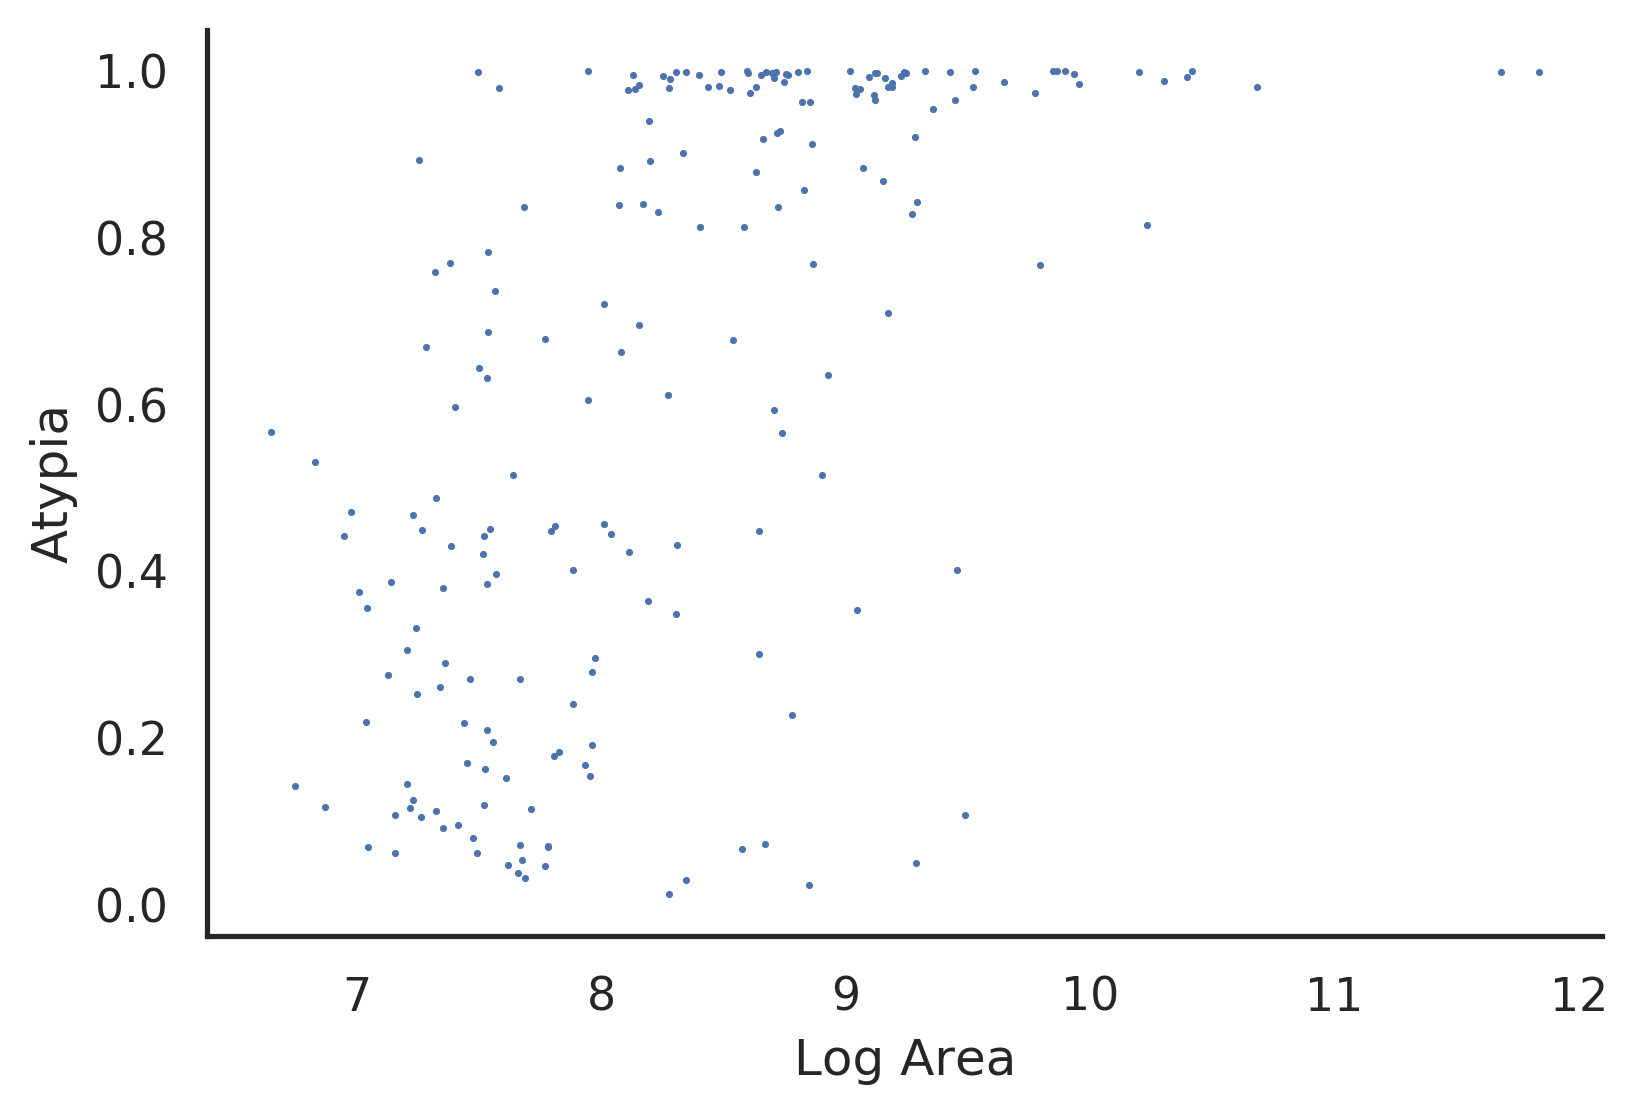

In [109]:
import numpy as np
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
plt.scatter(np.log(stat2[stat2['uro']>0.98]['filled_area']),stat2[stat2['uro']>0.98]['atypia'], s=0.5)
sns.despine()
plt.xlabel("Log Area")
plt.ylabel("Atypia")

In [ ]:
# higher area, higher chance atypical

Text(0, 0.5, 'NC Ratio')

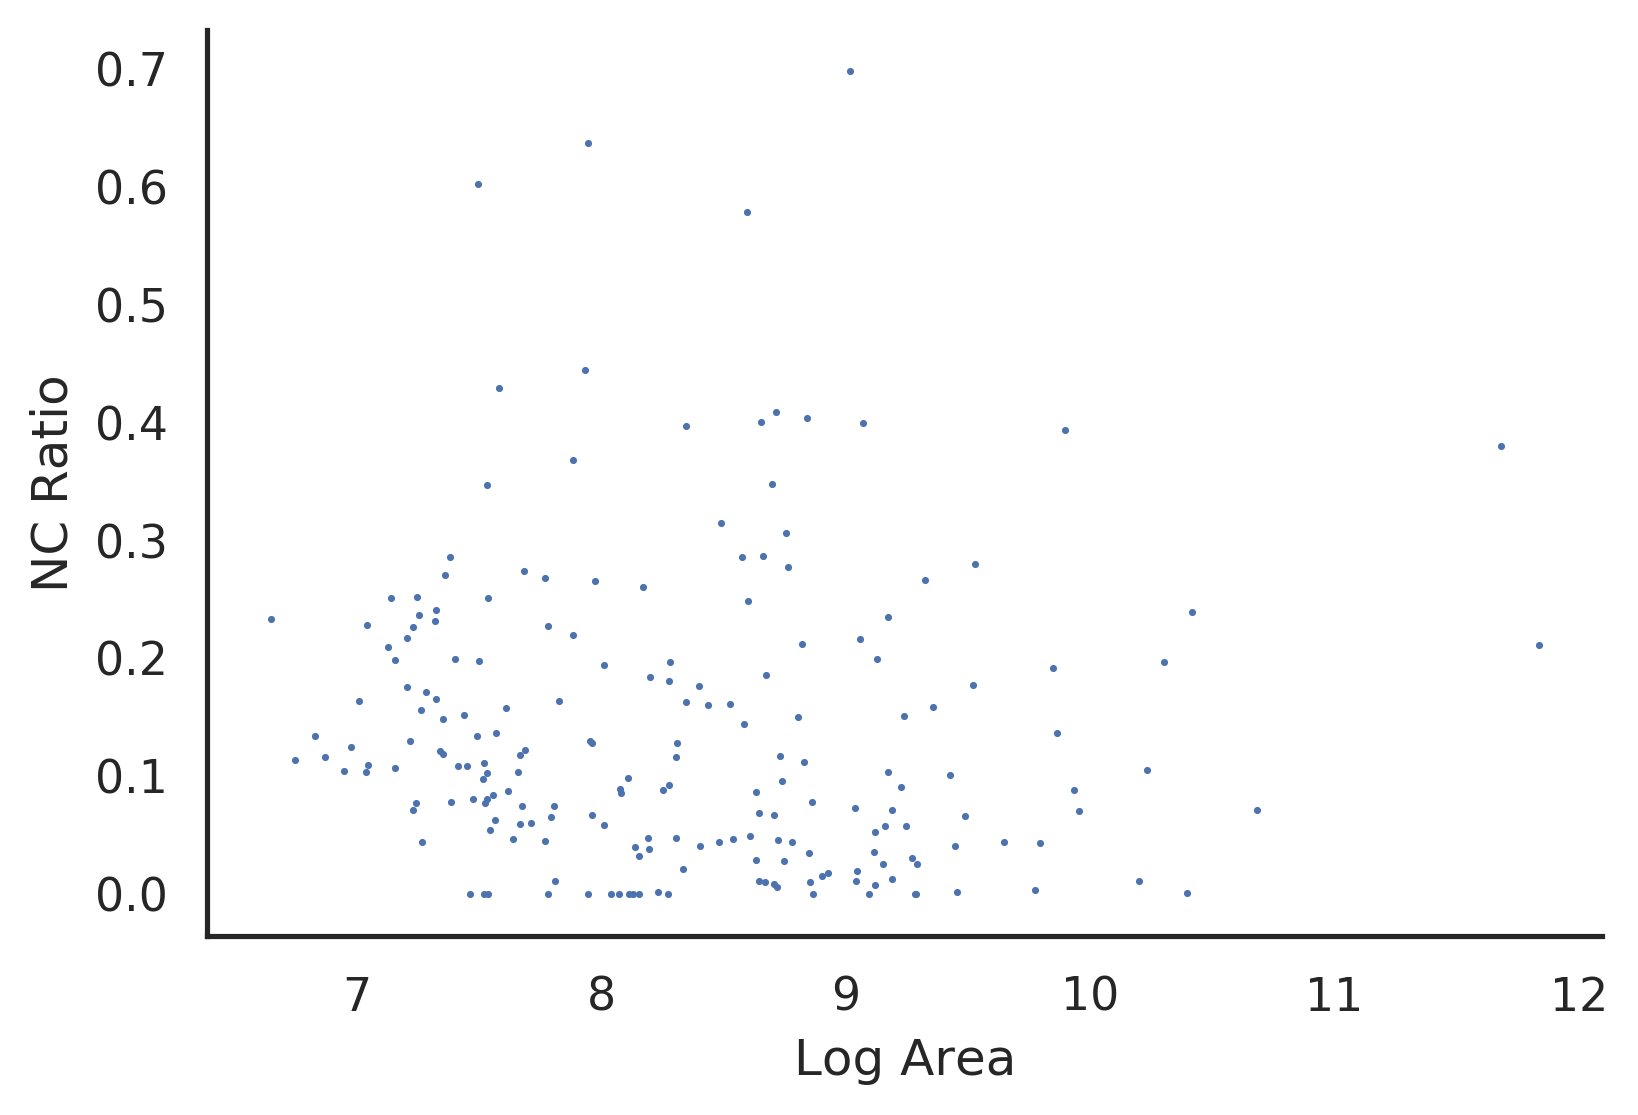

In [110]:
import numpy as np
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
plt.scatter(np.log(stat2[stat2['uro']>0.98]['filled_area']),stat2[stat2['uro']>0.98]['nc_ratio'], s=0.5)
sns.despine()
plt.xlabel("Log Area")
plt.ylabel("NC Ratio")

Text(0, 0.5, 'Atypia')

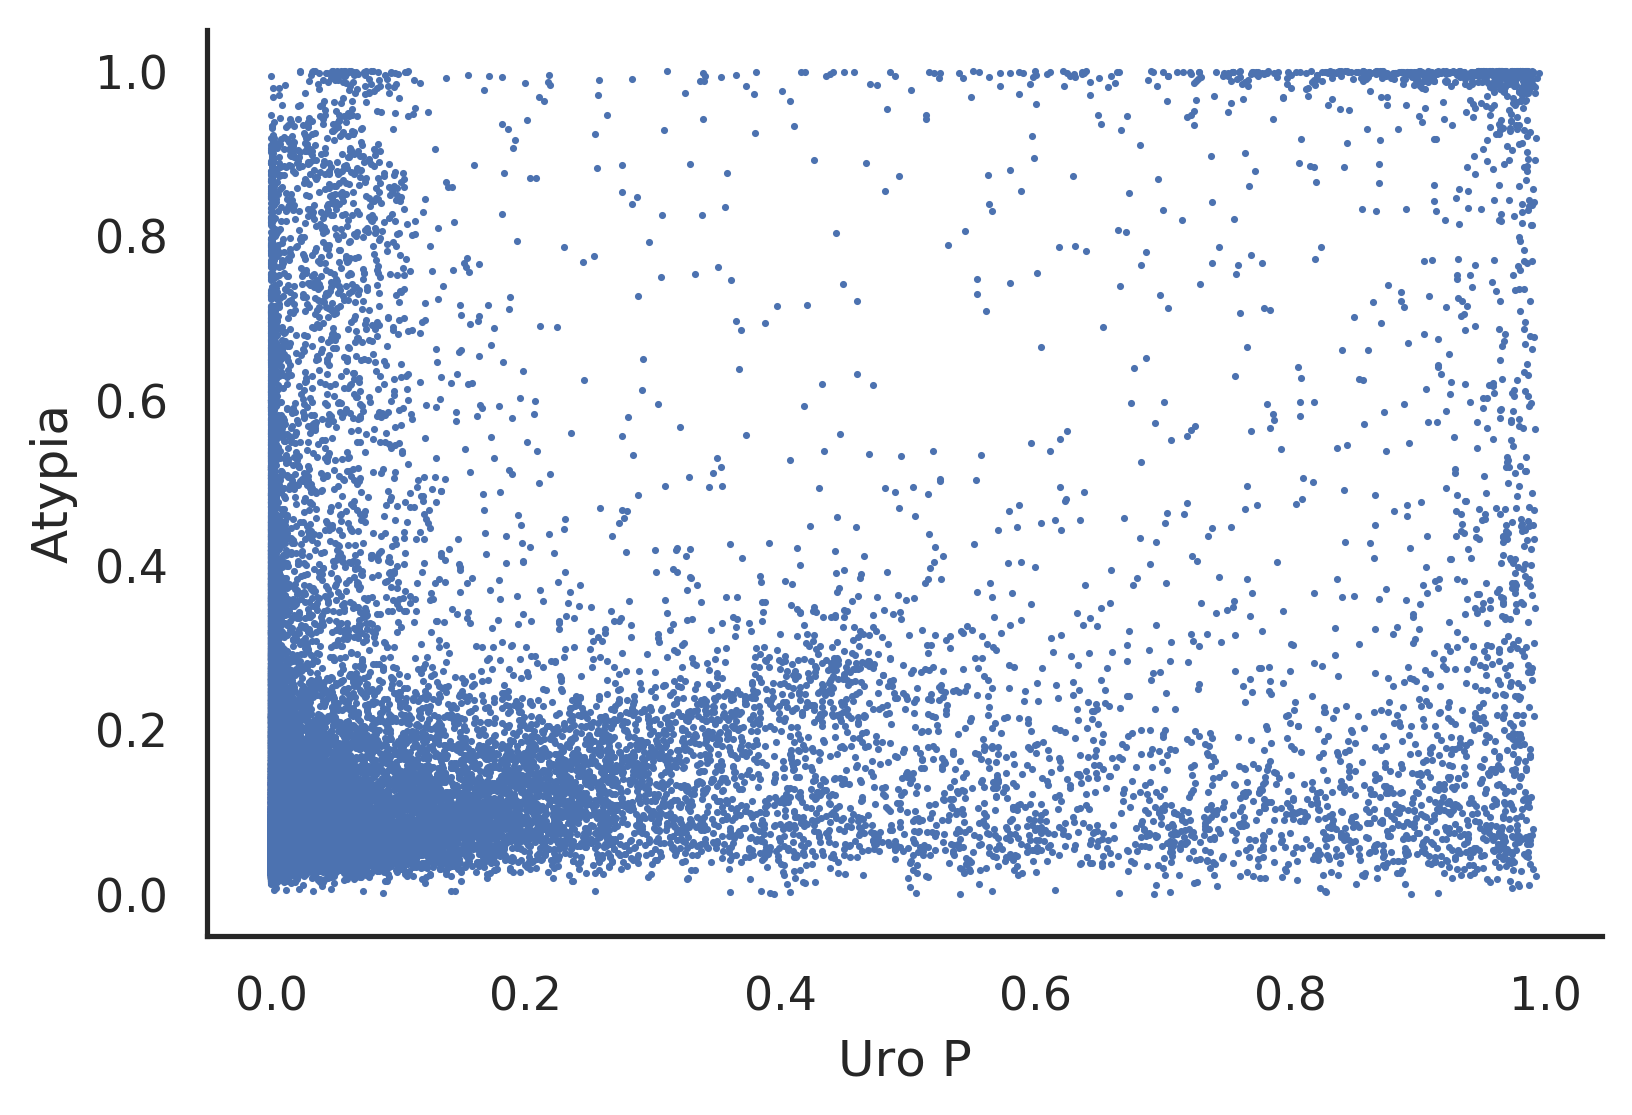

In [82]:
import numpy as np
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
plt.scatter(stat2['uro'],stat2['atypia'], s=0.5)
sns.despine()
plt.xlabel("Uro P")
plt.ylabel("Atypia")

In [ ]:
# if uro, higher chance of being atypia; maybe do include atypia cells then sum probabilities; and train with only larger cells

Text(0, 0.5, 'NC')

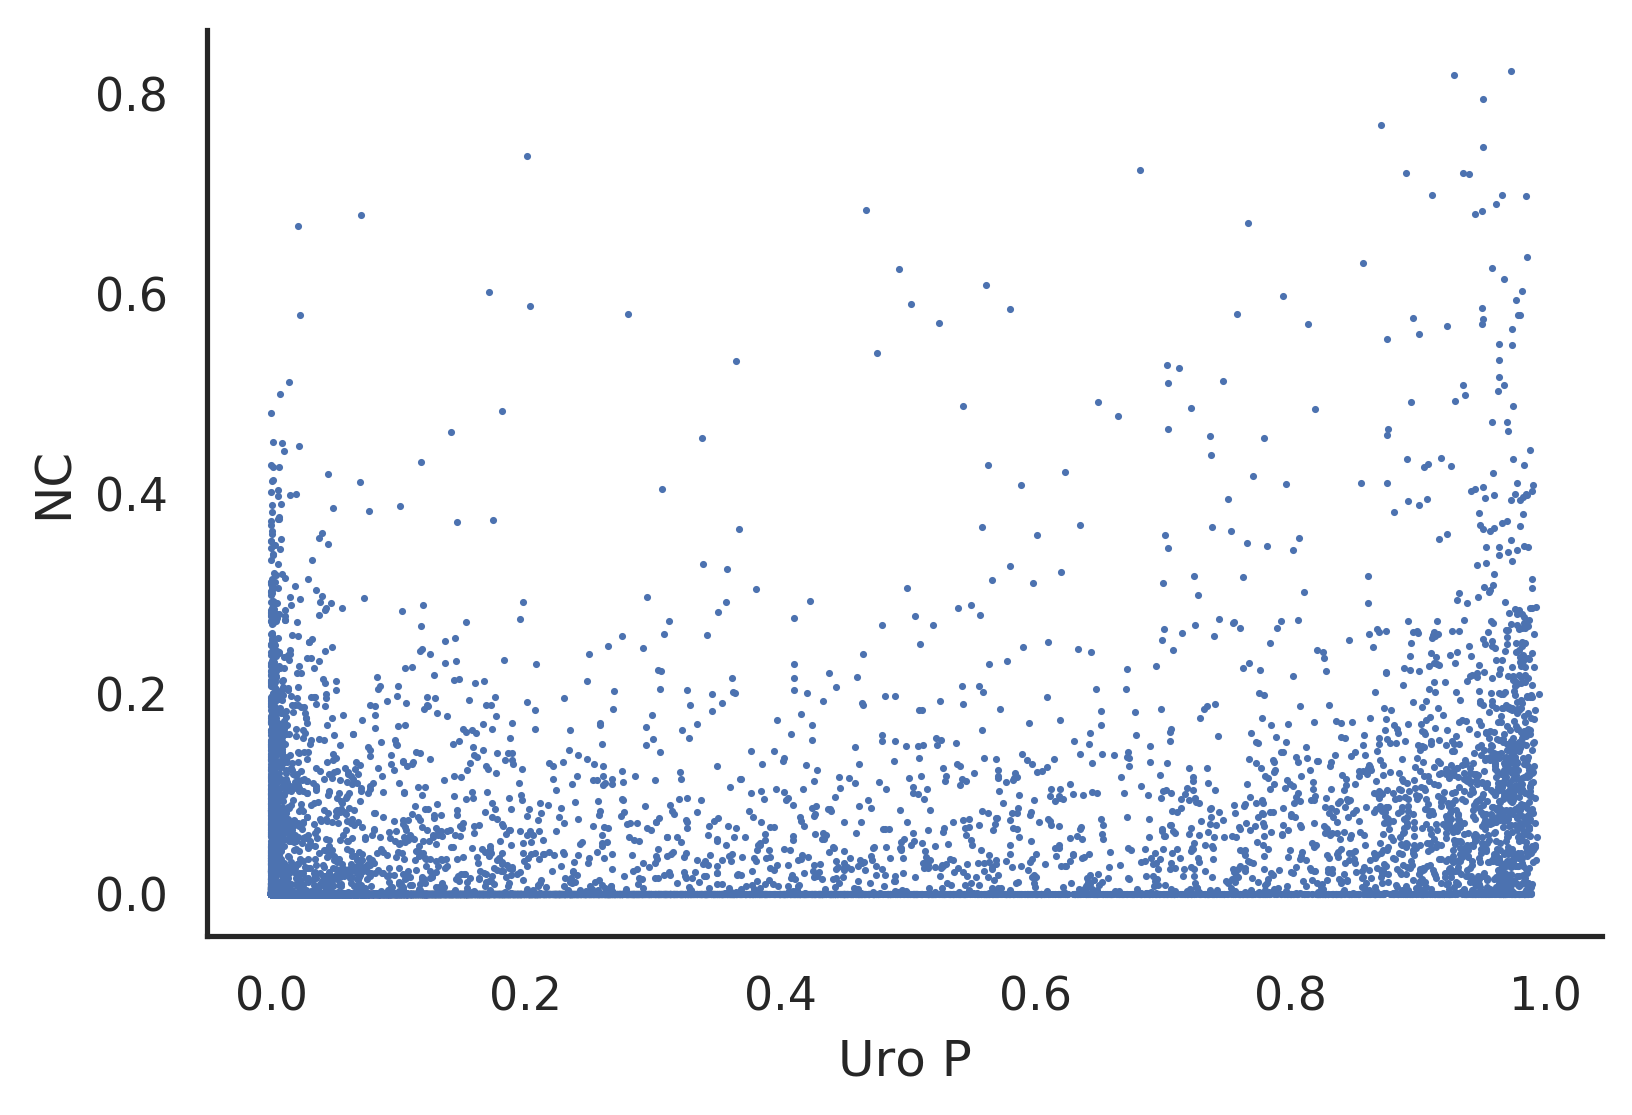

In [83]:
import numpy as np
matplotlib.rcParams['figure.dpi']=300
sns.set(style='white')
plt.scatter(stat2['uro'],stat2['nc_ratio'], s=0.5)
sns.despine()
plt.xlabel("Uro P")
plt.ylabel("NC")